In [1]:
"""
Script for visualizing WaveFake dataset statistics and features.
This script can be converted to a Jupyter notebook using jupytext.
"""

'\nScript for visualizing WaveFake dataset statistics and features.\nThis script can be converted to a Jupyter notebook using jupytext.\n'

In [4]:
import os
import sys

# Add project root to Python path
notebook_dir = os.path.dirname(os.path.abspath(''))
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added {project_root} to Python path")

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from tqdm import tqdm
from utils.dataset.wavefake_extractor import extract_labels, extract_audio_files

In [6]:
# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

C:\Users\Kacper\AppData\Local\Temp\ipykernel_31560\1253565385.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [7]:
# Set random seed for reproducibility
np.random.seed(42)

In [8]:
# Load dataset information
labels = extract_labels()
audio_files = extract_audio_files()

In [9]:
# Create DataFrame with labels and paths
df = pd.DataFrame({
    'filename': list(labels.keys()),
    'label': list(labels.values()),
    'path': [path for path, name in audio_files.items() if name in labels]
})

In [10]:
# Print basic statistics
print(f"Total number of samples: {len(df)}")
print(f"\nClass distribution:")
print(df['label'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))

Total number of samples: 27084

Class distribution:
1    88.88%
0    11.12%
Name: label, dtype: object


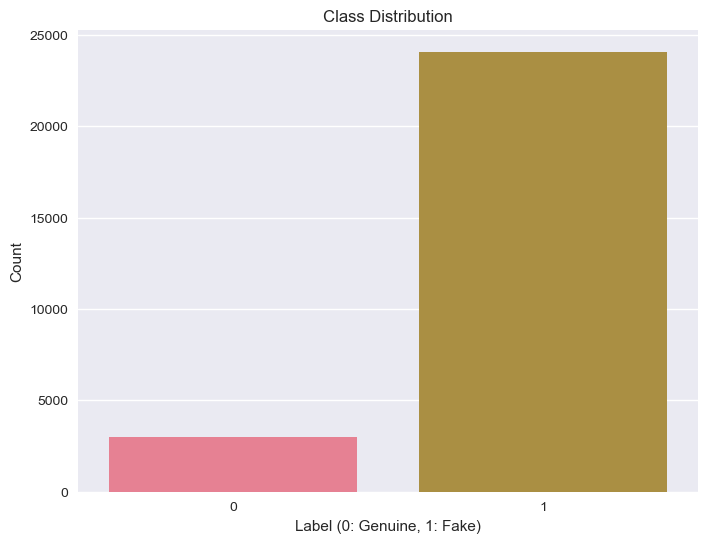

In [11]:
# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')
plt.title('Class Distribution')
plt.xlabel('Label (0: Genuine, 1: Fake)')
plt.ylabel('Count')
plt.show()

In [12]:
def plot_waveform(audio_path, title=None):
    """Plot waveform of an audio file."""
    y, sr = librosa.load(audio_path)
    
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title or 'Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

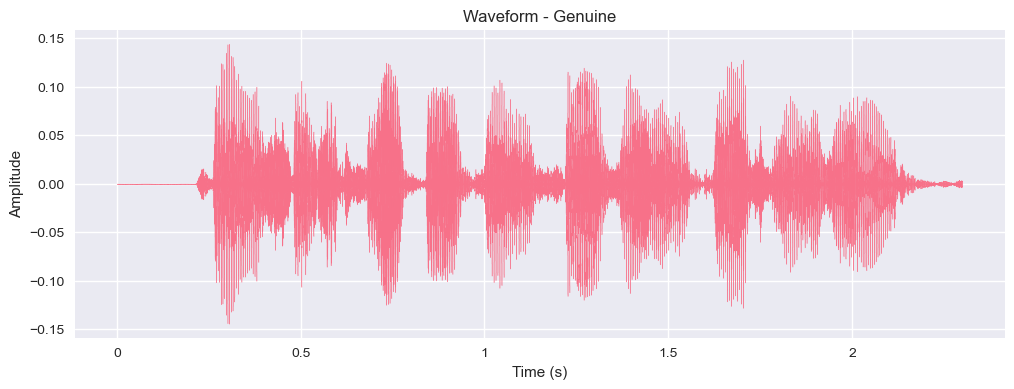

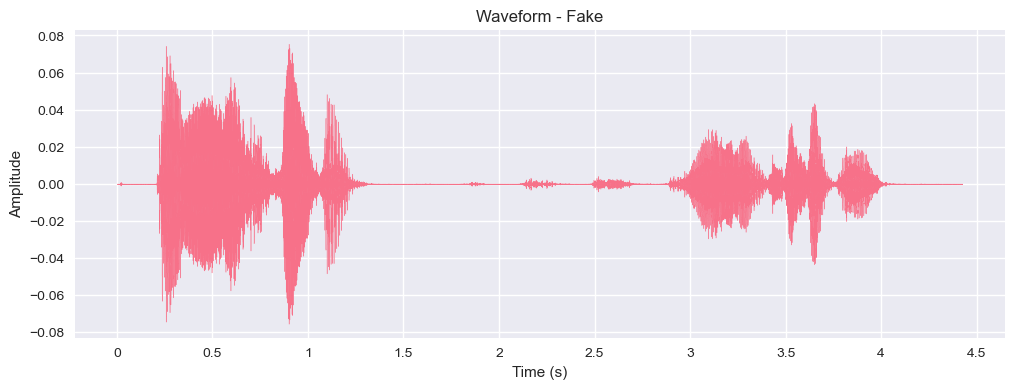

In [13]:
# Plot examples from each class
for label in [0, 1]:
    sample = df[df['label'] == label].iloc[0]
    plot_waveform(sample['path'], f'Waveform - {"Genuine" if label == 0 else "Fake"}')

In [14]:
def plot_mfcc(audio_path, title=None):
    """Plot MFCC features of an audio file."""
    y, sr = librosa.load(audio_path)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfcc, sr=sr, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title or 'MFCC')
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficients')
    plt.show()

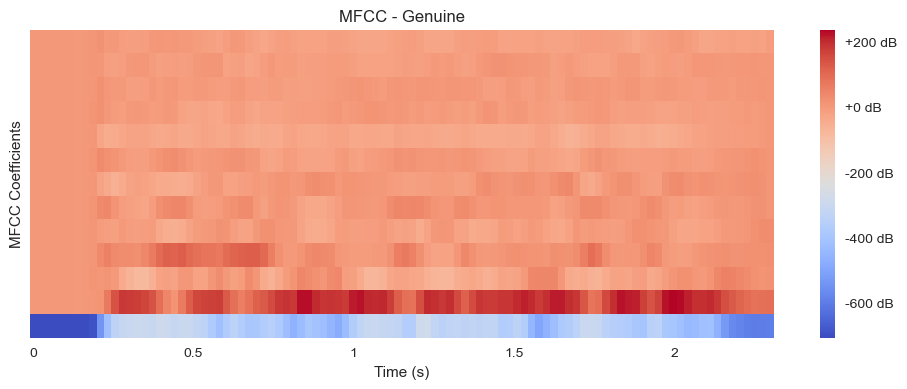

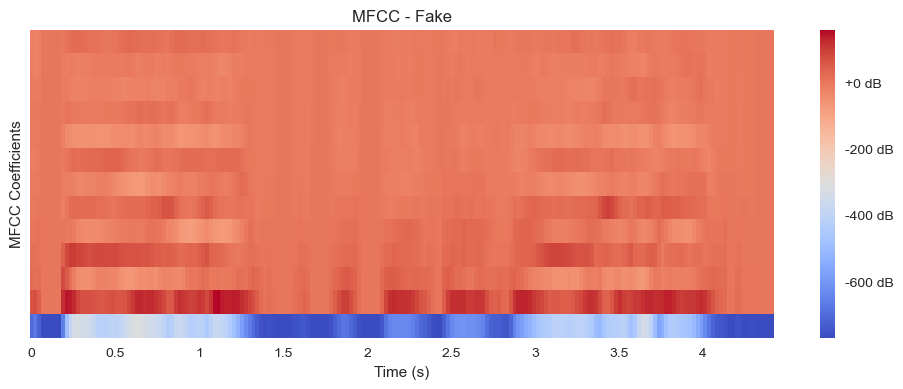

In [15]:
# Plot MFCC for examples from each class
for label in [0, 1]:
    sample = df[df['label'] == label].iloc[0]
    plot_mfcc(sample['path'], f'MFCC - {"Genuine" if label == 0 else "Fake"}')

In [16]:
def plot_spectrogram(audio_path, title=None):
    """Plot spectrogram of an audio file."""
    y, sr = librosa.load(audio_path)
    D = librosa.stft(y)
    DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title or 'Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

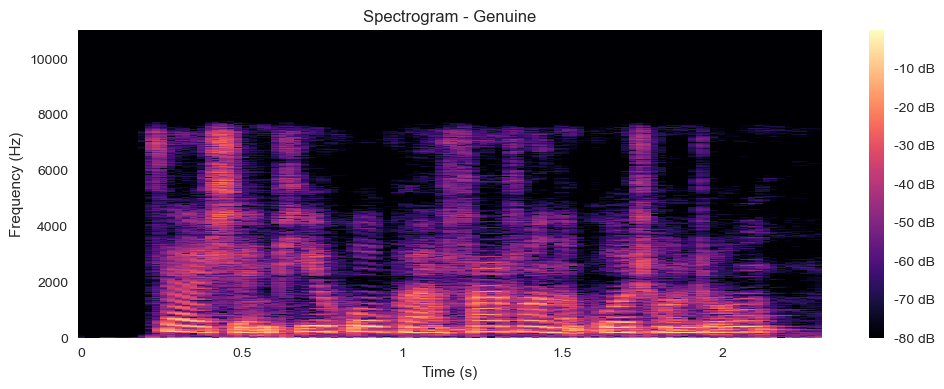

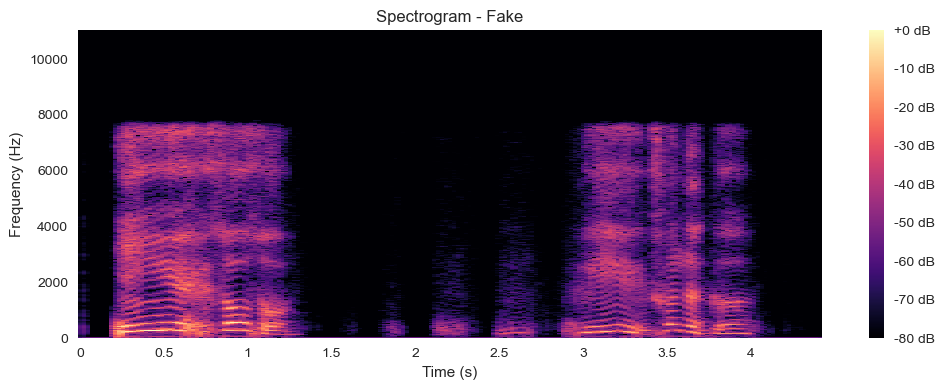

In [17]:
# Plot spectrograms for examples from each class
for label in [0, 1]:
    sample = df[df['label'] == label].iloc[0]
    plot_spectrogram(sample['path'], f'Spectrogram - {"Genuine" if label == 0 else "Fake"}')

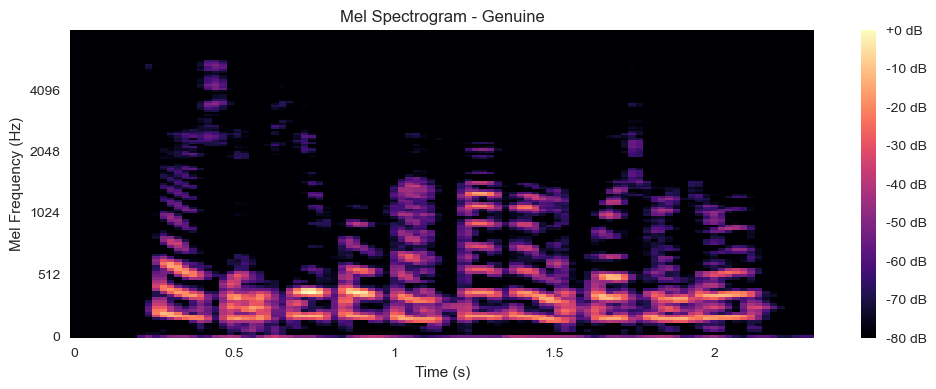

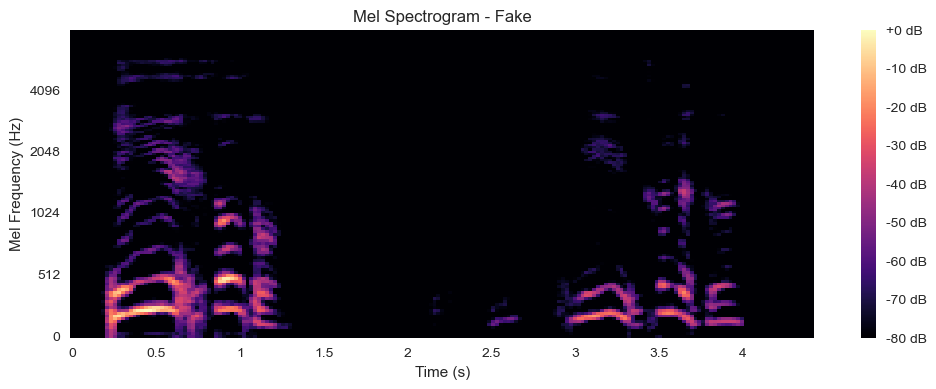

In [26]:
# Mel spectrogram
def plot_mel_spectrogram(audio_path, title=None):
    y, sr = librosa.load(audio_path)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    DB = librosa.amplitude_to_db(np.abs(mel_spectrogram), ref=np.max)
    
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='mel', fmax=8000, cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title or 'Mel Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Mel Frequency (Hz)')
    plt.show()

for label in [0, 1]:
    sample = df[df['label'] == label].iloc[0]
    plot_mel_spectrogram(sample['path'], f'Mel Spectrogram - {"Genuine" if label == 0 else "Fake"}')



In [18]:
def extract_features(audio_path):
    """Extract various audio features from a file."""
    y, sr = librosa.load(audio_path)
    
    # Extract various features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    rms = librosa.feature.rms(y=y)
    
    return {
        'mfcc_mean': np.mean(mfcc, axis=1),
        'mfcc_std': np.std(mfcc, axis=1),
        'spectral_centroid_mean': np.mean(spectral_centroid),
        'spectral_rolloff_mean': np.mean(spectral_rolloff),
        'spectral_bandwidth_mean': np.mean(spectral_bandwidth),
        'zero_crossing_rate_mean': np.mean(zero_crossing_rate),
        'rms_mean': np.mean(rms),
        'duration': len(y) / sr
    }

In [27]:
# Extract features for a subset of samples
n_samples = 1000  # Adjust as needed
features_list = []

In [28]:
for _, row in tqdm(df.sample(n_samples).iterrows(), total=n_samples, desc="Extracting features"):
    features = extract_features(row['path'])
    features['label'] = row['label']
    features_list.append(features)

Extracting features: 100%|██████████| 1000/1000 [00:38<00:00, 26.10it/s]


In [29]:
# Create DataFrame with features
features_df = pd.DataFrame(features_list)
features_df

,mfcc_mean,mfcc_std,spectral_centroid_mean,spectral_rolloff_mean,spectral_bandwidth_mean,zero_crossing_rate_mean,rms_mean,duration,label
0,"[-477.01517, 117.000114, -26.71823, 32.91533, ...","[129.22849, 40.89411, 30.689932, 25.96062, 20....",1819.901754,3761.214378,1907.117569,0.071174,0.007346,3.060000,1
1,"[-548.88855, 131.37274, -6.232327, 31.805817, ...","[96.96022, 34.13248, 36.88932, 17.710146, 18.0...",1092.846479,2086.958896,1513.173924,0.037496,0.005289,2.550023,1
2,"[-421.82812, 108.64505, -0.67296493, 37.892773...","[92.979095, 47.121235, 31.967327, 30.776295, 2...",1435.347988,2693.020685,1596.287361,0.073307,0.027152,3.829977,0
3,"[-434.89157, 115.81856, -22.139519, 56.898087,...","[59.86962, 29.103487, 27.389975, 20.368208, 17...",1561.498965,3483.139160,1832.974828,0.059339,0.009407,6.962540,1
4,"[-501.73267, 97.806725, -21.178102, 32.259495,...","[110.87333, 44.64245, 33.09513, 29.601772, 17....",2141.982340,4099.314528,1855.927088,0.123139,0.006646,2.705034,1
...,...,...,...,...,...,...,...,...,...
995,"[-422.201, 94.97085, -21.13105, 58.337143, -20...","[71.479454, 25.398901, 24.761997, 23.61792, 14...",2049.529675,4519.785690,2080.829565,0.081245,0.010578,2.950023,1
996,"[-472.21286, 111.978645, -1.0338662, 30.532063...","[123.19524, 28.32519, 45.72614, 14.933256, 23....",1284.176409,2672.994469,1577.006082,0.048037,0.015676,2.687528,1
997,"[-460.089, 97.37263, -19.048111, 51.367023, -1...","[102.24021, 28.676777, 42.036667, 25.376886, 2...",1889.016821,3850.562375,1864.778209,0.087544,0.011349,1.987528,1
998,"[-450.99768, 97.012985, -8.136157, 24.595665, ...","[73.245514, 33.512703, 27.41372, 24.590868, 15...",1556.792754,3490.902328,1839.996913,0.051533,0.011680,2.950023,1


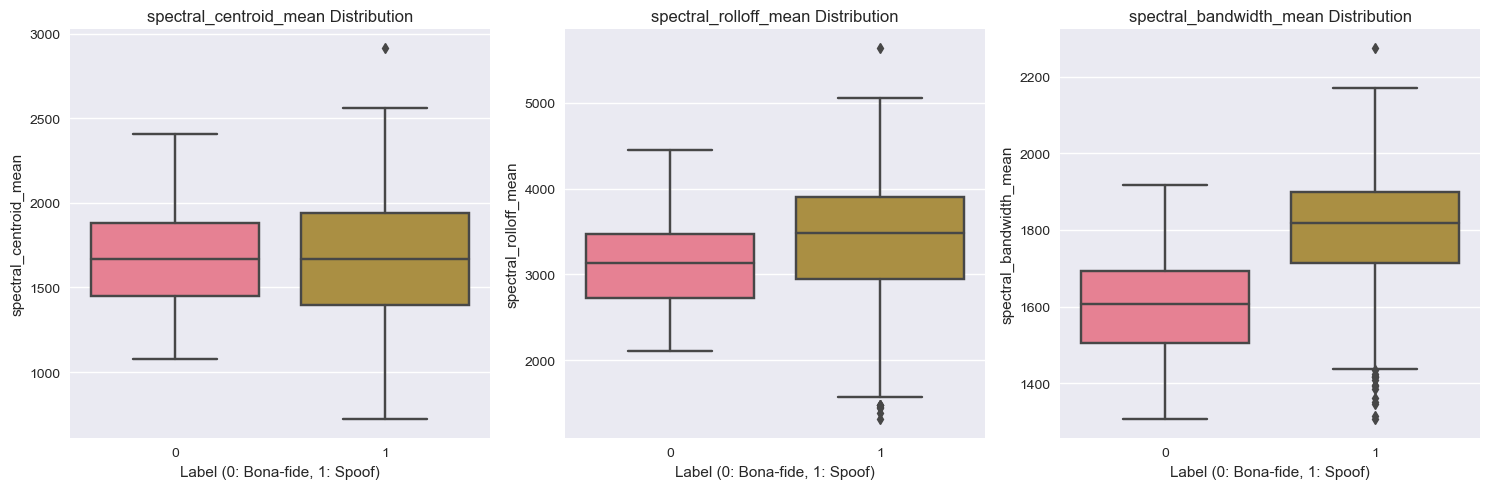

In [31]:
# Plot feature distributions
feature_cols = ['spectral_centroid_mean', 'spectral_rolloff_mean', 'spectral_bandwidth_mean']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(feature_cols):
    sns.boxplot(data=features_df, x='label', y=col, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel('Label (0: Bona-fide, 1: Spoof)')

plt.tight_layout()
plt.show()

C:\Users\Kacper\AppData\Local\Temp\ipykernel_31560\919435886.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 7, k+1 + 14*i)
C:\Users\Kacper\AppData\Local\Temp\ipykernel_31560\919435886.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 7, k+1 + 14*i)


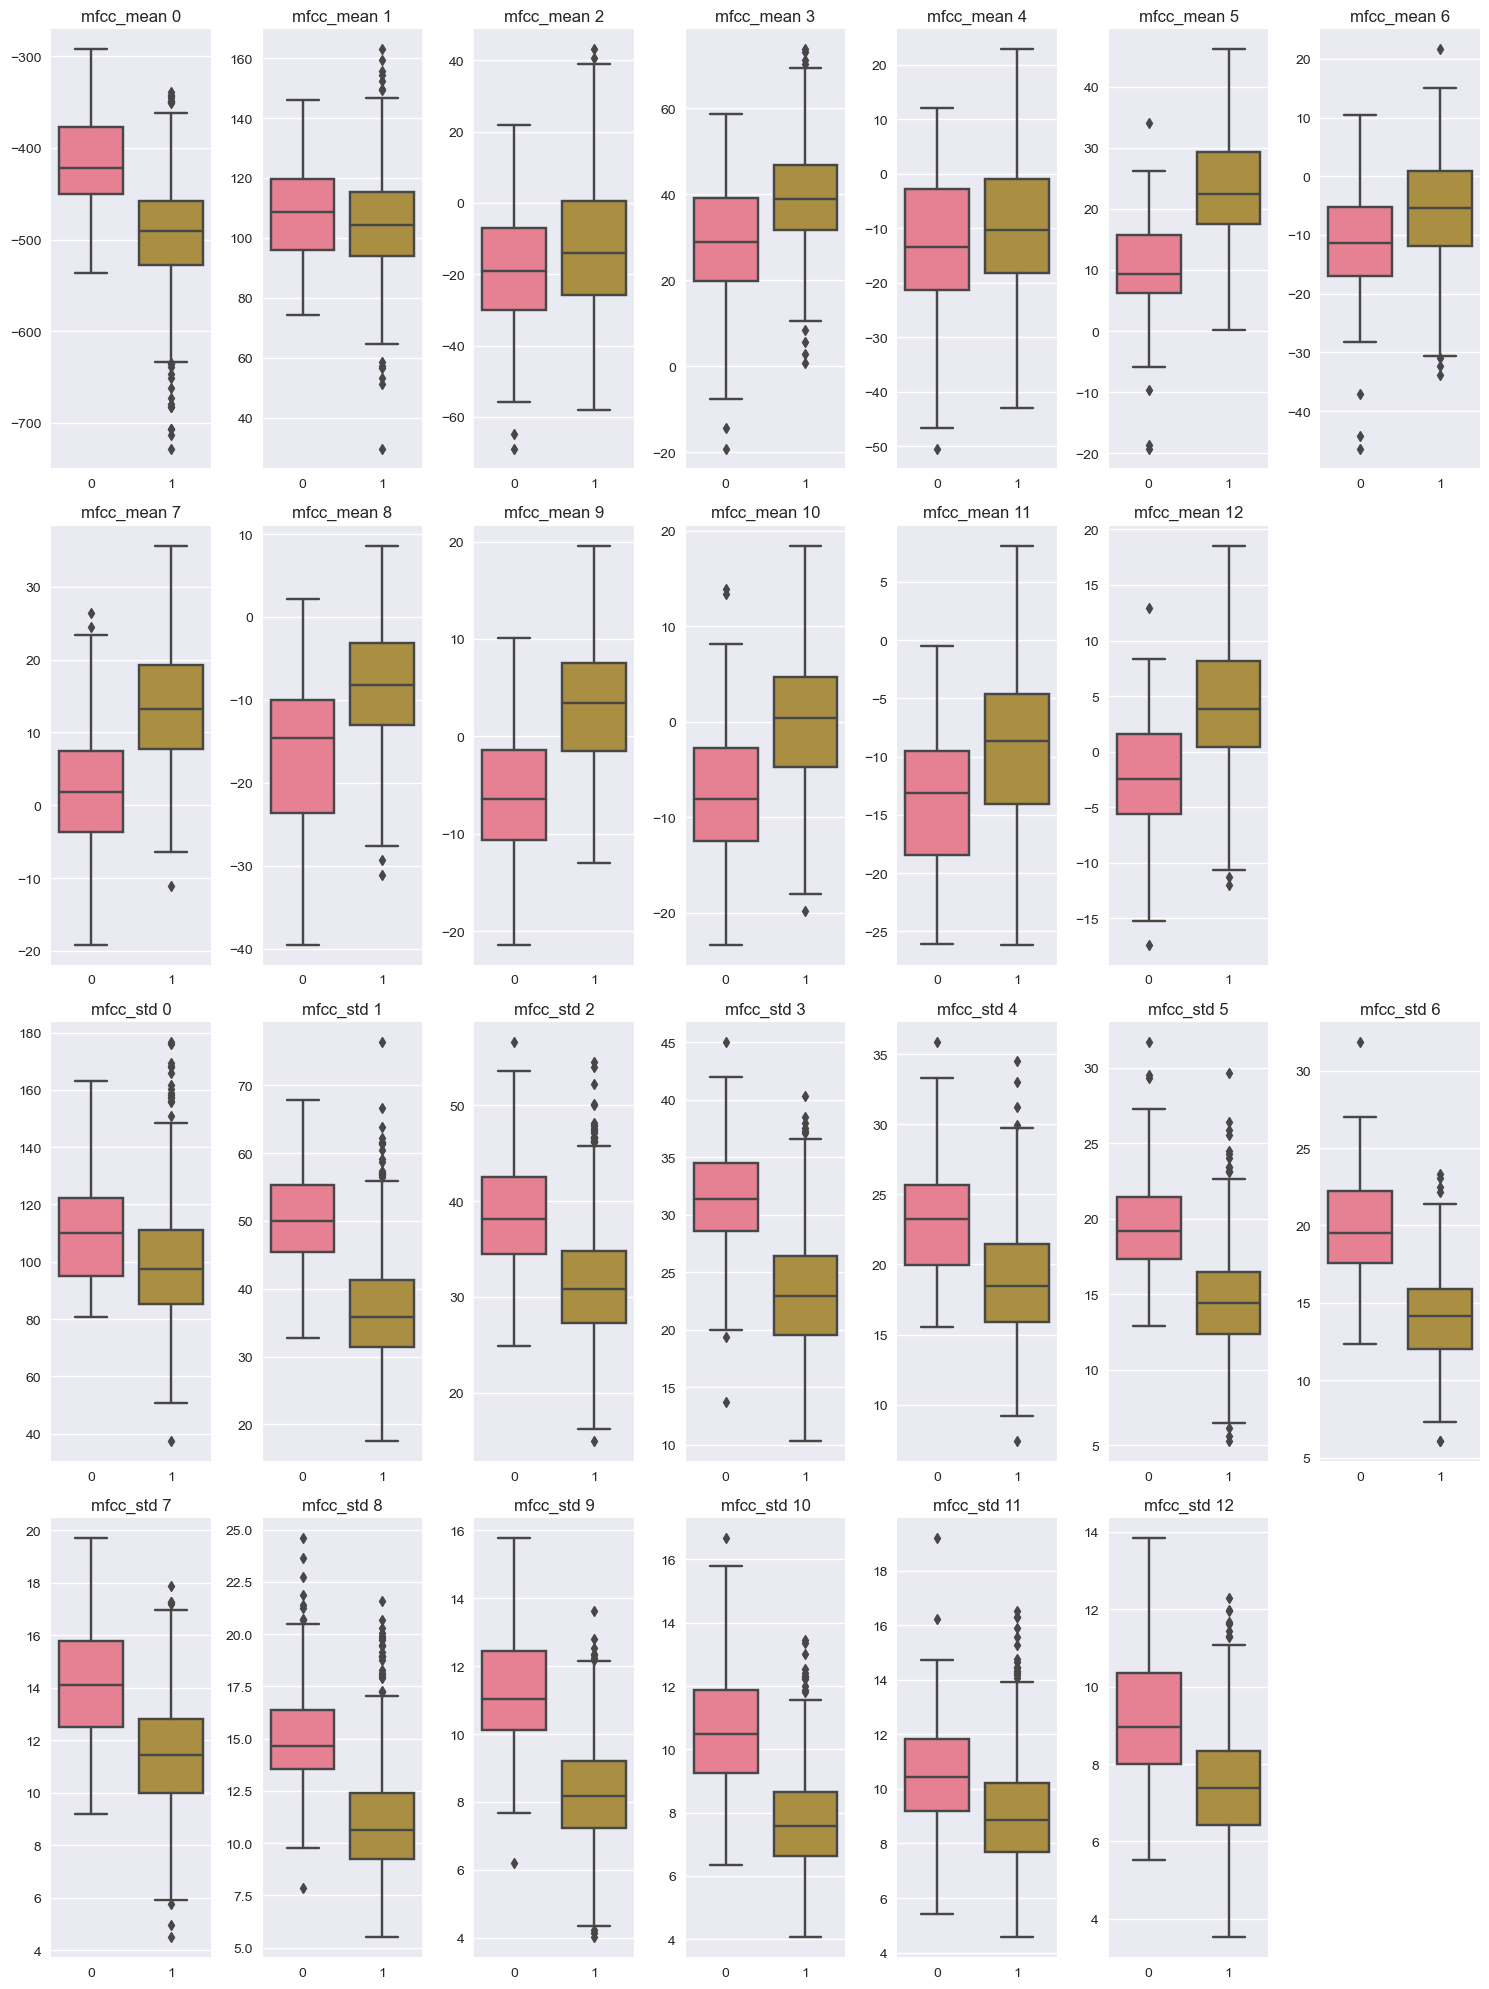

In [32]:
# Plot MFCC coefficient distributions based on label
features = ['mfcc_mean', 'mfcc_std']    
fig, axes = plt.subplots(1, 2, figsize=(15, 20))

for i, feature in enumerate(features):
    mfcc_col = feature
    mfcc_df = pd.DataFrame(features_df[mfcc_col].tolist(), index=features_df.index, columns=[f'{mfcc_col}_{i}' for i in range(13)])
    mfcc_df['label'] = features_df['label']
    mfcc_cols = [f'{mfcc_col}_{i}' for i in range(13)]

    for k, col in enumerate(mfcc_cols):
        plt.subplot(4, 7, k+1 + 14*i)
        sns.boxplot(data=mfcc_df, x='label', y=col)
        plt.title(f'{mfcc_col} {k}')
        plt.xlabel('')
        plt.ylabel('')
plt.tight_layout()
plt.show()


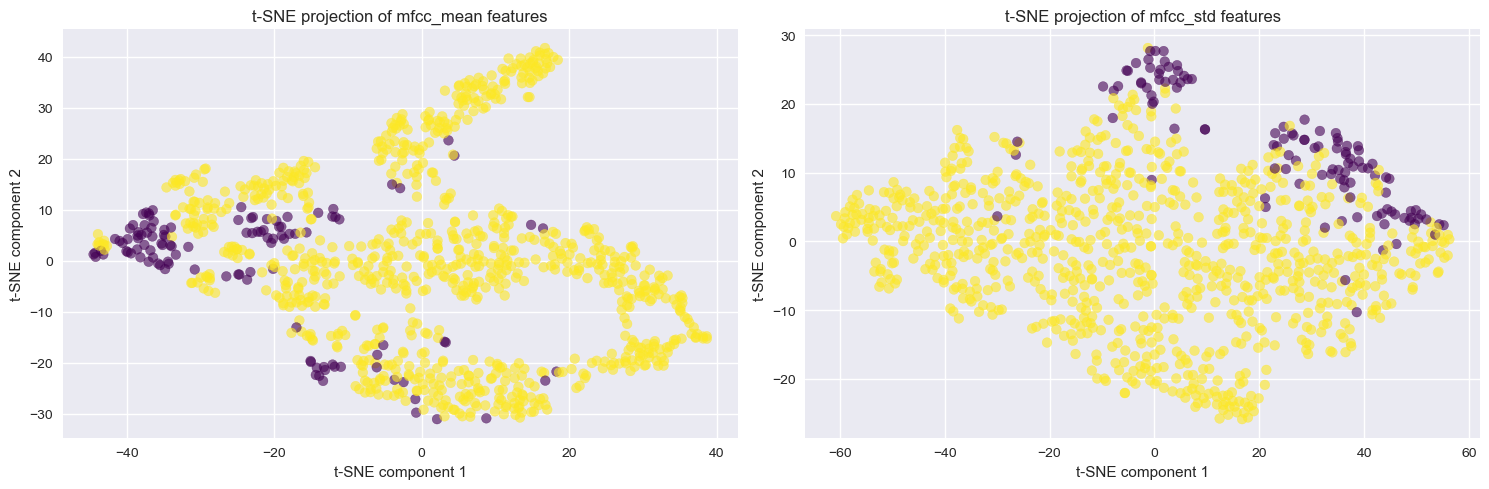

In [33]:
# Project MFCC features to 2D using t-SNE
from sklearn.manifold import TSNE

features = ['mfcc_mean', 'mfcc_std']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, feature in enumerate(features):
    X = np.array(features_df[feature].tolist())
    y = features_df['label']

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Create scatter plot
    axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.6)
    axes[i].set_title(f't-SNE projection of {feature} features')
    axes[i].set_xlabel('t-SNE component 1')
    axes[i].set_ylabel('t-SNE component 2')

plt.tight_layout()
plt.show()

In [40]:
# Additional analysis: Feature correlations
feature_matrix = np.column_stack([features_df['mfcc_mean'].apply(lambda x: x[i]) for i in range(13)])
feature_matrix = np.hstack([
    feature_matrix,
    features_df[['spectral_centroid_mean', 'spectral_rolloff_mean', 'spectral_bandwidth_mean', 
                'zero_crossing_rate_mean', 'rms_mean', 'duration']].values
])
feature_names = [f'mfcc_{i}' for i in range(13)] + [
    'spectral_centroid_mean', 'spectral_rolloff_mean', 'spectral_bandwidth_mean', 
    'zero_crossing_rate_mean', 'rms_mean', 'duration'
]

correlation_matrix = np.corrcoef(feature_matrix.T)

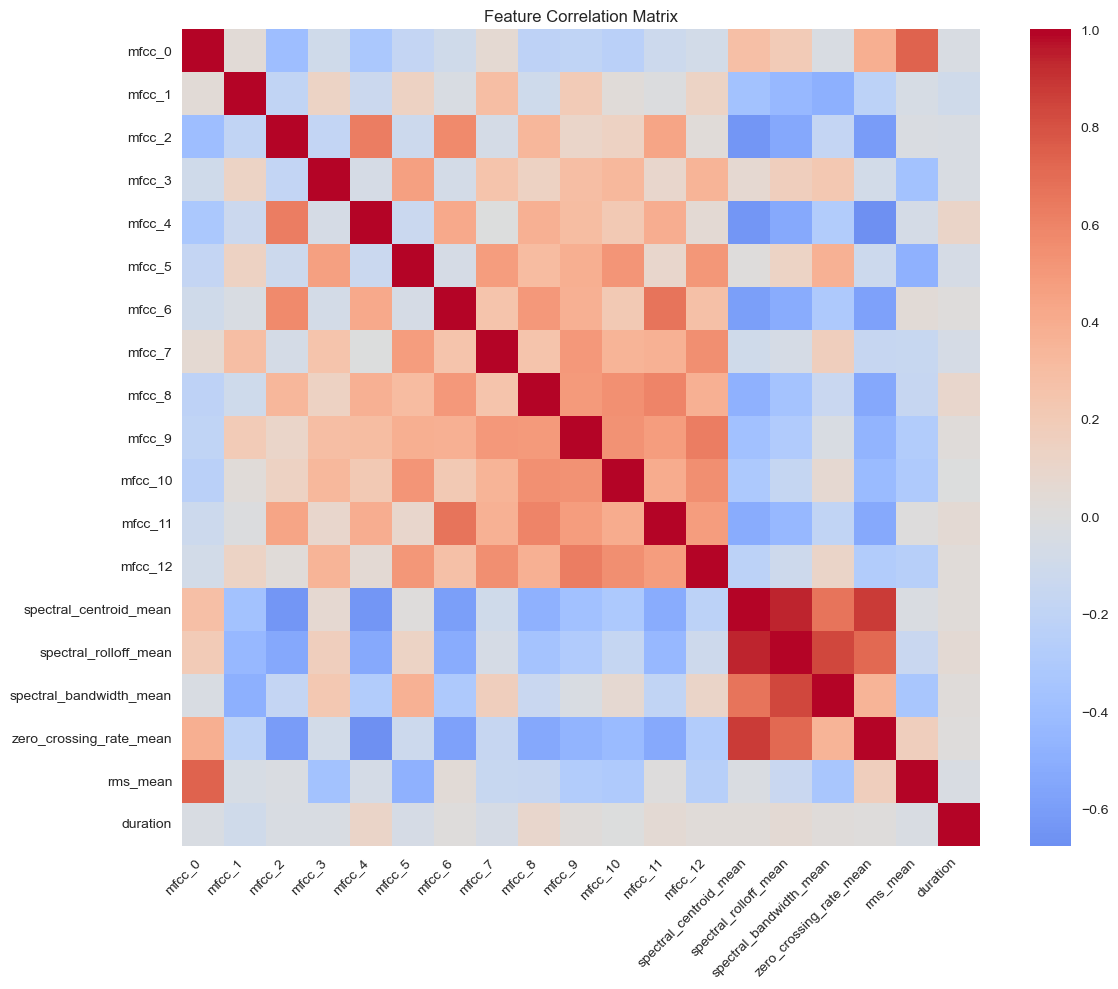

In [41]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, xticklabels=feature_names, yticklabels=feature_names, 
            cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show() 